In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/gdriveupmebot/archive (1).zip" -d "/tmp/data"

# Libraries

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, RocCurveDisplay
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
head_dir="/tmp/data"

In [10]:
print("Number of pictures")
for dir in os.listdir(head_dir):
  print(dir+": "+ str(len(os.listdir(head_dir+"/"+dir))))


Number of pictures
COVID: 1252
non-COVID: 1229
Data: 3


In [ ]:
dir=[i for i in os.listdir("/tmp/data/COVID")]

**Examples of data**

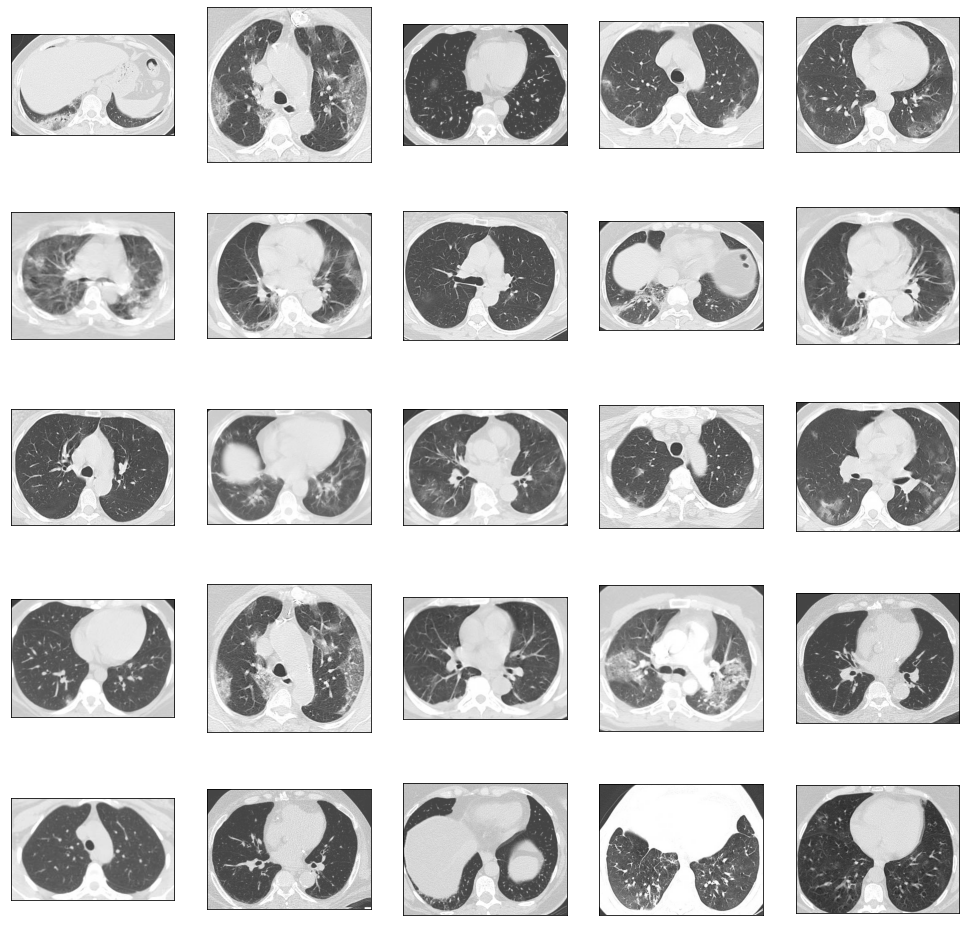

In [ ]:
def plot_defects(directory, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(17, 17))
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = "/tmp/data/"+directory+"/"+dir[n]
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(imread(image_path))
            n += 1
plot_defects("COVID",5,5)

In [ ]:
dir=[i for i in os.listdir("/tmp/data/non-COVID")]

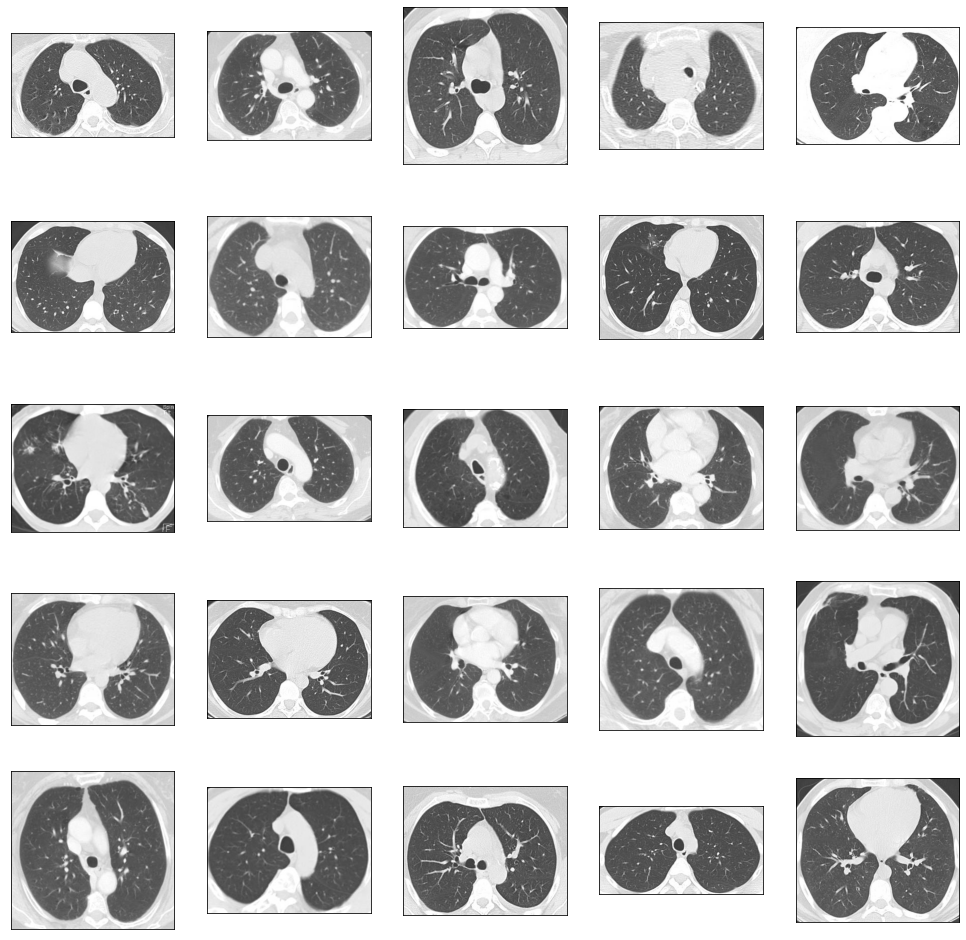

In [ ]:
plot_defects("non-COVID",5,5)

Informtaion of one of the pictures

In [ ]:
sample=Image.open("/tmp/data/non-COVID/Non-Covid (1).png")
sample.size

(321, 229)

In [ ]:
sample.mode

'RGBA'

**Storing images as list and converting them to rgb**

*Reducing one of the dimentions (alpha)*

In [33]:
data=[[],[]]
for i in os.listdir("/tmp/data/COVID"):
  temp=Image.open("/tmp/data/COVID/"+i)
  data[0].append(temp.convert("L"))

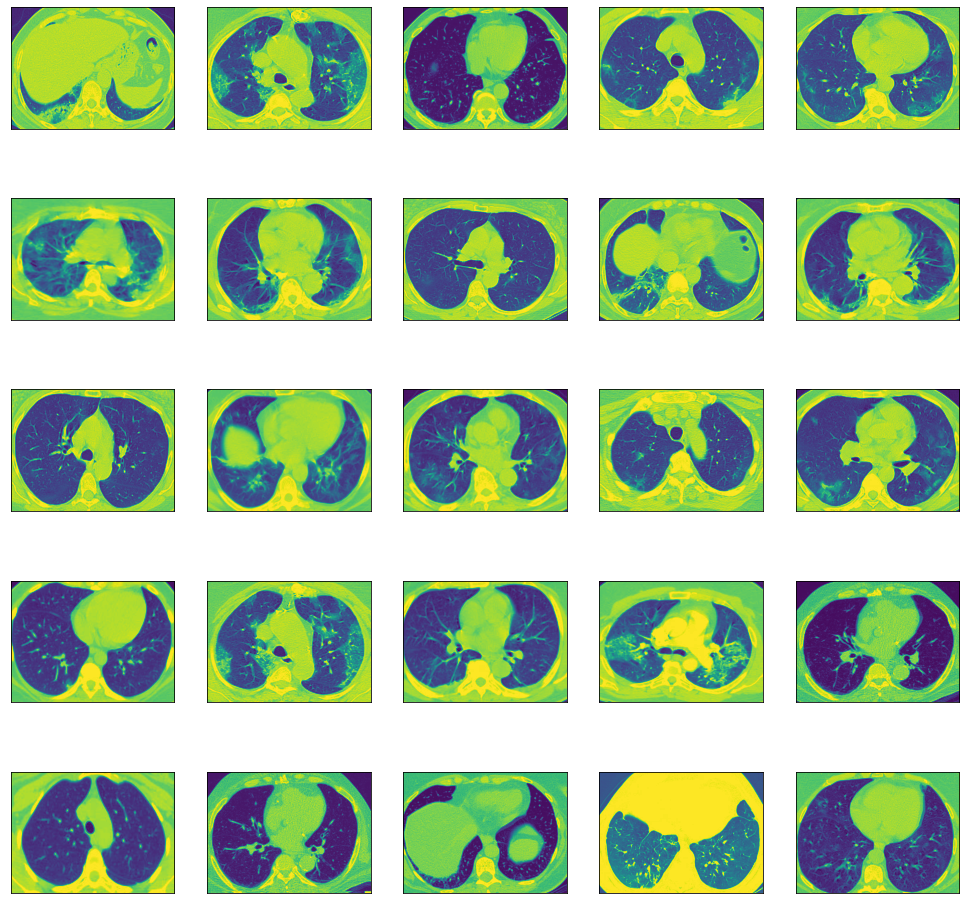

In [31]:
def plot_defects(df, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(17, 17))
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = df[n]
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(image_path)
            n += 1

plot_defects(data[0],5,5)

In [34]:
for i in os.listdir("/tmp/data/non-COVID"):
  temp=Image.open("/tmp/data/non-COVID/"+i)
  data[1].append(temp.convert("L"))

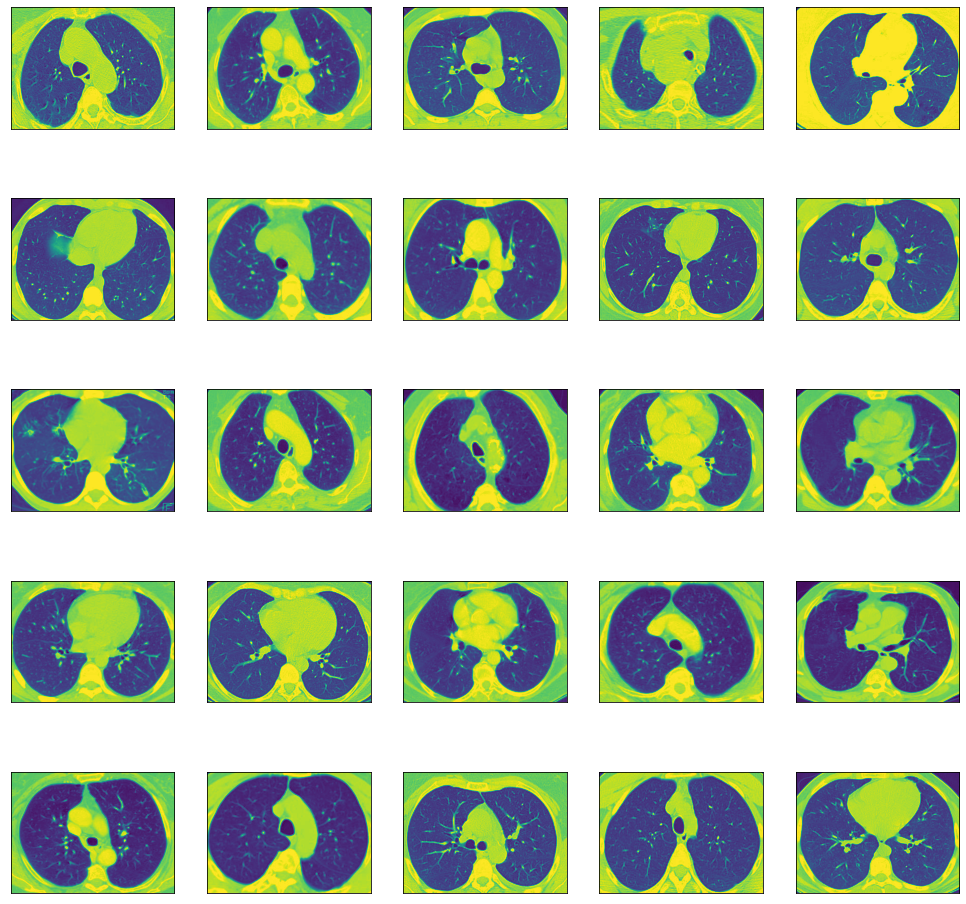

In [32]:
plot_defects(data[1],5,5)

**Resolutions**

In [ ]:
width=[]
height=[]
for i in data[0]:
  width_temp,height_temp=i.size
  width.append(width_temp)
  height.append(height_temp)

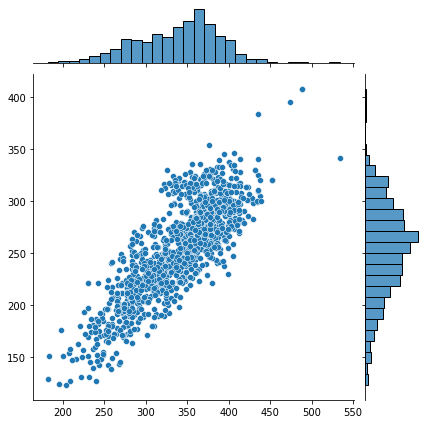

In [ ]:
sns.jointplot(x=width,y=height)

In [ ]:
print(sum(width)/len(width))
print(sum(height)/len(height))

338.2667731629393
252.7803514376997


In [ ]:
width=[]
height=[]

for i in data[1]:
  width_temp,height_temp=i.size
  width.append(width_temp)
  height.append(height_temp)

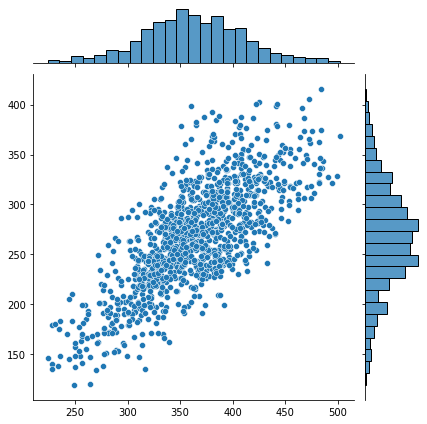

In [ ]:
sns.jointplot(x=width,y=height)

In [ ]:
print(sum(width)/len(width))
print(sum(height)/len(height))

362.6859235150529
267.2262001627339


In [ ]:
print((338+362)/2)
print((253+267)/2)

350.0
260.0


**Resizing images and splitting data**

In [35]:
for i in range(2):
  for j in range(len(data[i])):
    data[i][j]=data[i][j].resize((100,74))

In [36]:
x=[]
y=[]
for i in range(2):
  for j in data[i]:
    x.append(np.asarray(j).astype(np.float32))
    y.append(np.asarray(i).astype(np.float32))

In [37]:
x=np.array(x).reshape(-1,100,74,1)

In [49]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=.1)
xtrain, xval, ytrain, yval= train_test_split(xtrain,ytrain, test_size=.1)

In [51]:
ytrain=to_categorical(ytrain)
yval=to_categorical(yval)

In [40]:
print(len(xtrain))
print(len(ytest))
print(len(yval))

2008
249
224


# Model

In [19]:
es=EarlyStopping(patience=5)

In [52]:
model = Sequential()

model.add(Conv2D(32,(3,3) ,activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(32, (3,3) ,activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(32, (3,3) ,activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation="sigmoid"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(xtrain, ytrain , validation_data=(xval, yval), callbacks=[es], epochs=15)

Epoch 1/15
63/63 [==============================] - 3s 26ms/step - loss: 6.3549 - accuracy: 0.5787 - val_loss: 0.6187 - val_accuracy: 0.6429
Epoch 2/15
63/63 [==============================] - 1s 17ms/step - loss: 0.5644 - accuracy: 0.7181 - val_loss: 0.5544 - val_accuracy: 0.7232
Epoch 3/15
63/63 [==============================] - 1s 15ms/step - loss: 0.5149 - accuracy: 0.7555 - val_loss: 0.5964 - val_accuracy: 0.6830
Epoch 4/15
63/63 [==============================] - 1s 14ms/step - loss: 0.4678 - accuracy: 0.7759 - val_loss: 0.5341 - val_accuracy: 0.7455
Epoch 5/15
63/63 [==============================] - 1s 14ms/step - loss: 0.4192 - accuracy: 0.7998 - val_loss: 0.4697 - val_accuracy: 0.7857
Epoch 6/15
63/63 [==============================] - 1s 14ms/step - loss: 0.3745 - accuracy: 0.8252 - val_loss: 0.4076 - val_accuracy: 0.8170
Epoch 7/15
63/63 [==============================] - 1s 14ms/step - loss: 0.3422 - accuracy: 0.8471 - val_loss: 0.4023 - val_accuracy: 0.8259
Epoch 8/15
63

# Results

In [21]:
import pandas as pd

In [53]:
history=pd.DataFrame(model.history.history)

In [54]:
history

loss  accuracy  val_loss  val_accuracy
0   6.354892  0.578685  0.618655      0.642857
1   0.564430  0.718127  0.554440      0.723214
2   0.514950  0.755478  0.596423      0.683036
3   0.467840  0.775896  0.534107      0.745536
4   0.419218  0.799801  0.469652      0.785714
5   0.374518  0.825199  0.407583      0.816964
6   0.342168  0.847112  0.402270      0.825893
7   0.295110  0.874502  0.382822      0.830357
8   0.249088  0.897410  0.341900      0.888393
9   0.249064  0.894920  0.374435      0.830357
10  0.308632  0.869024  0.485679      0.794643
11  0.225367  0.903884  0.409845      0.830357
12  0.174842  0.926793  0.348528      0.866071
13  0.135432  0.948207  0.447319      0.812500

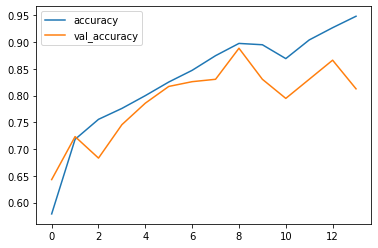

In [55]:
history[["accuracy","val_accuracy"]].plot()

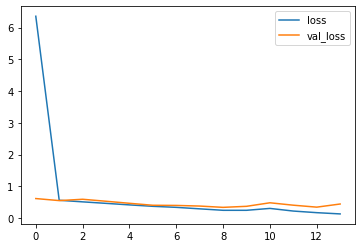

In [56]:
history[["loss","val_loss"]].plot()

In [57]:
prediction=np.argmax(model.predict(xtest), axis=-1)

In [58]:
print(classification_report(prediction, ytest))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       154
           1       0.73      0.93      0.81        95

    accuracy                           0.84       249
   macro avg       0.84      0.86      0.84       249
weighted avg       0.86      0.84      0.84       249



In [59]:
print(confusion_matrix(prediction, ytest))

[[121  33]
 [  7  88]]


In [60]:
fpr, tpr, _=roc_curve(prediction, ytest)

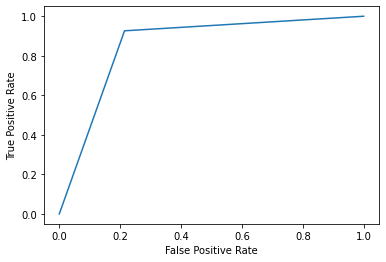

In [61]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()